<a href="https://colab.research.google.com/github/utkarshg1/Test1/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image classification with CNN (Convolutional Neural Network)

In [ ]:
from warnings import filterwarnings
filterwarnings("ignore")

## Step 1 - Load Image dataset from Keras

In [1]:
from keras.datasets import mnist
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [2]:
xtrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [3]:
xtrain.shape

(60000, 28, 28)

In [4]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [5]:
xtest

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
xtest.shape

(10000, 28, 28)

In [7]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

### Visualizing handwritten digits from data

In [8]:
xtrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

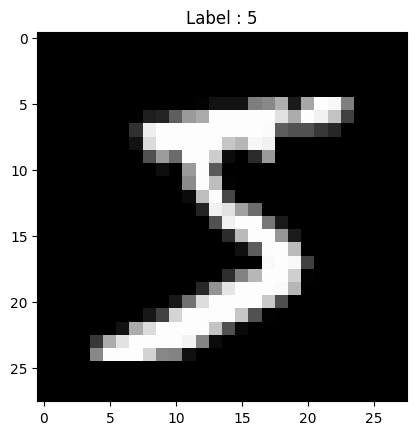

In [10]:
plt.imshow(xtrain[0], cmap="gray")
plt.title(f"Label : {ytrain[0]}")
plt.show()

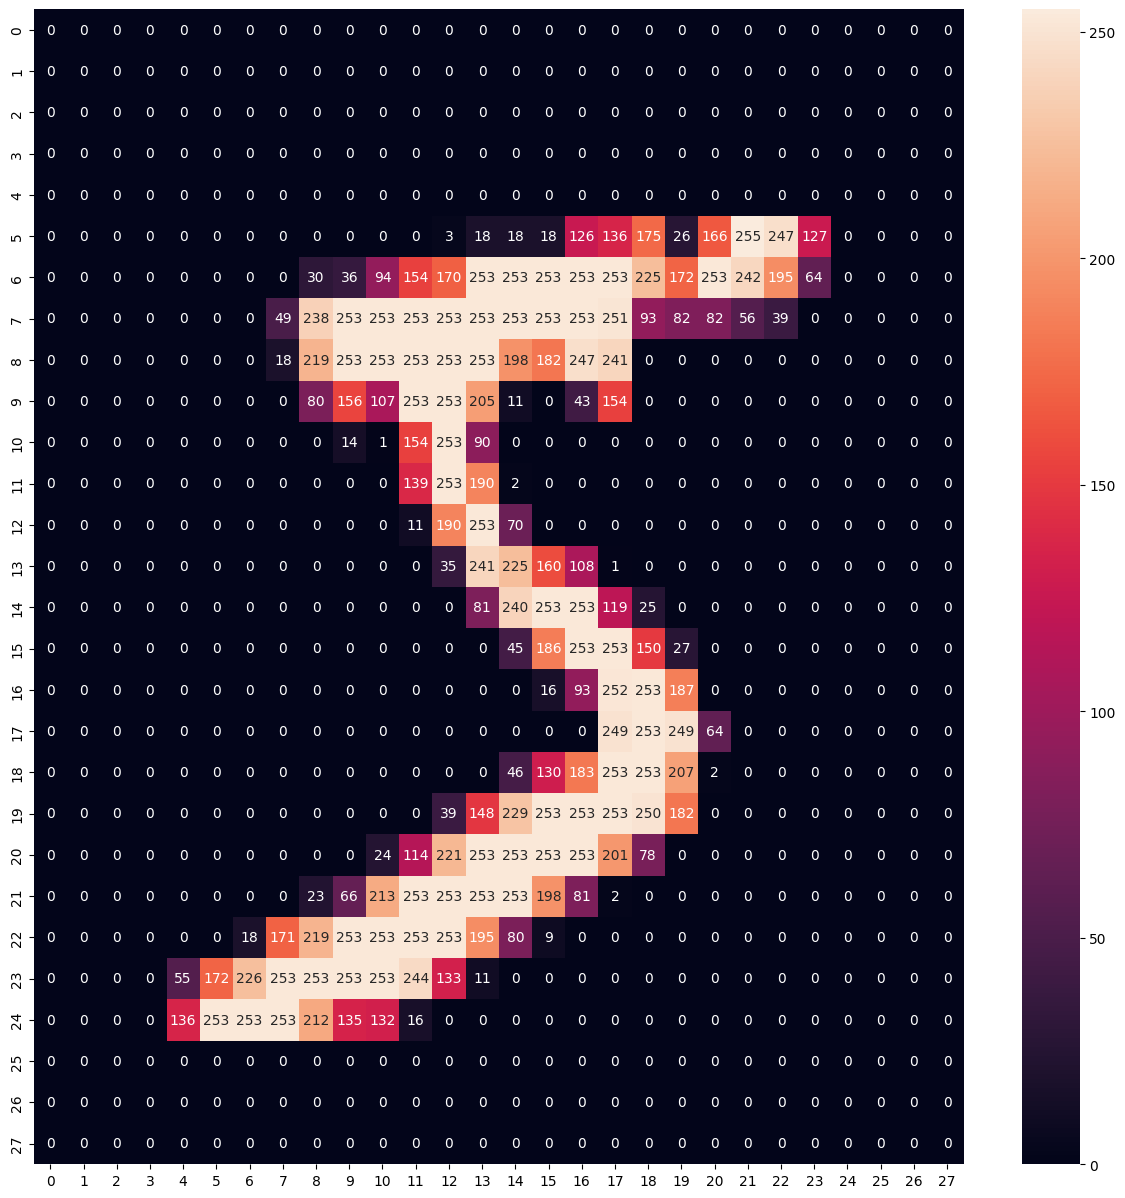

In [11]:
plt.figure(figsize=(15, 15))
sns.heatmap(xtrain[0], annot=True, fmt="d")
plt.show()

### Visualuze first 9 images from train data

In [12]:
list(range(9))

[0, 1, 2, 3, 4, 5, 6, 7, 8]

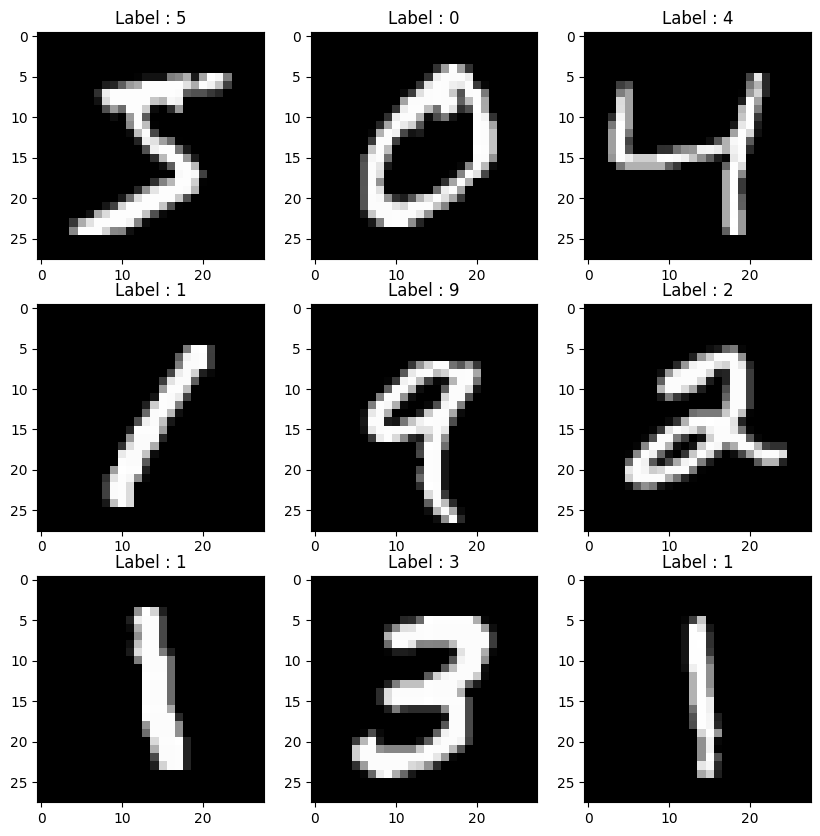

In [13]:
plt.figure(figsize=(10, 10))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(xtrain[i], cmap="gray")
  plt.title(f"Label : {ytrain[i]}")

# Show the plot
plt.show()

### Preprocessing on data

In [14]:
import numpy as np

In [15]:
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [16]:
xtrain_scl = xtrain.astype("float32")/255
xtest_scl = xtest.astype("float32")/255

In [17]:
xtrain_scl[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Because above is multiclass classification problem you need to one hot encode y data

In [18]:
import numpy as np

In [19]:
# Make sure the image shape is (28, 28, 1)
xtrain_scl = np.expand_dims(xtrain_scl, -1)
xtest_scl = np.expand_dims(xtest_scl, -1)

In [20]:
from keras.utils import to_categorical

In [21]:
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [22]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [23]:
ytrain_cat[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [24]:
xtrain.shape

(60000, 28, 28)

In [25]:
ytrain_cat.shape

(60000, 10)

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Convolution2D, MaxPooling2D, Flatten, Input

In [27]:
model = Sequential(
    [
        Input(shape=(28, 28, 1)),
        Convolution2D(32, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Convolution2D(64, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dropout(0.5),
        Dense(10, activation="softmax")
    ]
)

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [30]:
hist = model.fit(xtrain_scl, ytrain_cat, validation_split=0.1, epochs=20, batch_size=32)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8522 - loss: 0.4728 - val_accuracy: 0.9825 - val_loss: 0.0579
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9715 - loss: 0.0946 - val_accuracy: 0.9867 - val_loss: 0.0445
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9782 - loss: 0.0682 - val_accuracy: 0.9897 - val_loss: 0.0403
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.9830 - loss: 0.0528 - val_accuracy: 0.9915 - val_loss: 0.0335
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9847 - loss: 0.0500 - val_accuracy: 0.9913 - val_loss: 0.0344
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9856 - loss: 0.0422 - val_accuracy: 0.9898 - val_loss: 0.0331
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9853 - loss: 0.0422 - val_accuracy: 0.9912 - val_loss: 0.0324
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9883 - loss: 0.0350 

## Plot the learning curve

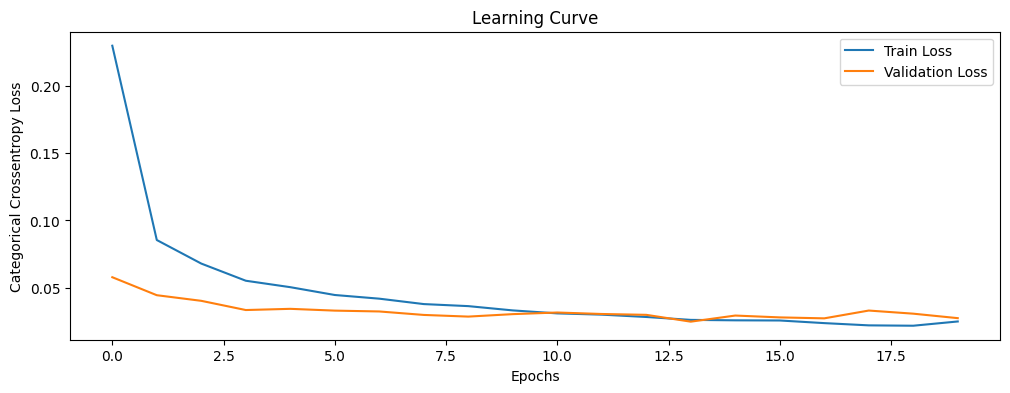

In [31]:
plt.figure(figsize=(12, 4))
plt.plot(hist.history["loss"], label="Train Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Categorical Crossentropy Loss")
plt.title("Learning Curve")
plt.legend()
plt.show()

### Model Evaluation

In [32]:
model.evaluate(xtrain_scl, ytrain_cat)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9981 - loss: 0.0057


[0.008071624673902988, 0.9975666403770447]

In [33]:
model.evaluate(xtest_scl, ytest_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9921 - loss: 0.0277


[0.022733965888619423, 0.993399977684021]

In [34]:
yprob_train = model.predict(xtrain_scl)
yprob_train[0:5]

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


array([[1.4478680e-12, 5.6332825e-13, 3.2204576e-11, 2.1093490e-03,
        2.1988657e-14, 9.9788898e-01, 2.4754059e-12, 3.3771971e-07,
        2.6445417e-08, 1.3559126e-06],
       [9.9999988e-01, 1.6943915e-17, 4.9026628e-08, 3.8396579e-14,
        6.3831397e-12, 1.0132569e-12, 1.3308854e-08, 1.9027309e-14,
        4.9123366e-10, 1.2866480e-08],
       [1.9787239e-17, 8.2624624e-08, 1.3610444e-11, 2.8690646e-14,
        9.9999988e-01, 4.2447279e-13, 1.4998257e-13, 7.7648226e-09,
        4.7853266e-10, 3.7907957e-09],
       [1.9943729e-10, 9.9999857e-01, 1.3750862e-07, 8.8904204e-13,
        7.8215709e-07, 3.1289979e-12, 8.7035437e-09, 2.0679178e-07,
        2.7333817e-07, 4.4053669e-10],
       [4.1097303e-14, 1.9659449e-13, 5.8272921e-11, 1.9005329e-10,
        6.8706046e-05, 5.9461653e-13, 3.4487190e-15, 8.6741458e-08,
        7.4133568e-06, 9.9992371e-01]], dtype=float32)

In [35]:
ypred_train = np.argmax(yprob_train, axis=1)

In [36]:
ypred_train[0:5]

array([5, 0, 4, 1, 9])

In [37]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [38]:
yprob_test = model.predict(xtest_scl)
ypred_test = np.argmax(yprob_test, axis=1)
ypred_test[0:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([7, 2, 1, 0, 4])

In [39]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

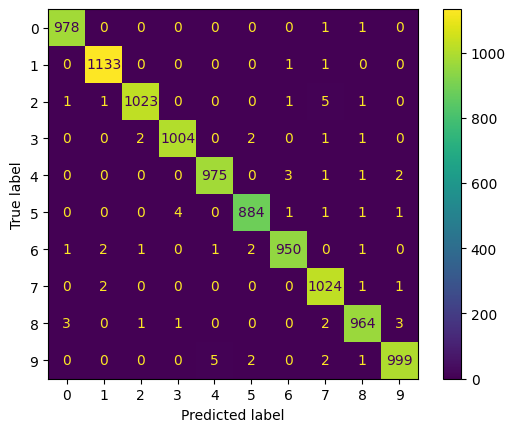

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest, ypred_test)

In [41]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### From above results the model is a good model because f1_macro > 0.8

### Save the model

In [49]:
model.save("artifacts\digit_model.keras")

### Load the model

In [44]:
from keras.models import load_model
m = load_model("artifacts\digit_model.keras")
m.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,480 (408.13 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 69,654 (272.09 KB)

# Out of sample training

In [45]:
import cv2

In [46]:
img = cv2.imread("/Out_Of_Sample_Data/Image_3.jpg", cv2.IMREAD_GRAYSCALE)
img

In [ ]:
img_scl = img.astype("float32")/255

In [ ]:
img_scl = img_scl.reshape(1, 28, 28, 1)

In [ ]:
img_scl

array([[[[0.00392157],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.00392157],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.00784314],
         [0.        ],
         [0.01176471],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.00392157],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.00392157],
         [0.        ],
         [0.        ],
         [0.00784314],
         [0.        ],
         [0.        ],
         [0.01960784],
         [0.        ],
         [0.        ],
         [0.01960784],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.00392157],
         

In [ ]:
prob = model.predict(img_scl)
prob

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


array([[1.9101261e-26, 3.3465560e-22, 7.7292588e-16, 1.0000000e+00,
        3.4733692e-22, 6.8143082e-13, 3.8651663e-23, 1.9793637e-19,
        1.3009614e-15, 6.8480236e-18]], dtype=float32)

In [ ]:
np.max(prob)

1.0

In [ ]:
pred = np.argmax(prob, axis=1)

In [ ]:
pred

array([3])

In [ ]:
def predict_digit(model, img_path):
  img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
  plt.imshow(img, cmap="gray")
  plt.show()
  img_scl = img.astype("float32")/255
  img_scl = img.reshape(1, 28, 28, 1)
  prob = model.predict(img_scl)
  pred = np.argmax(prob, axis=1)
  max_prob = np.max(prob, axis=1)
  return pred, max_prob

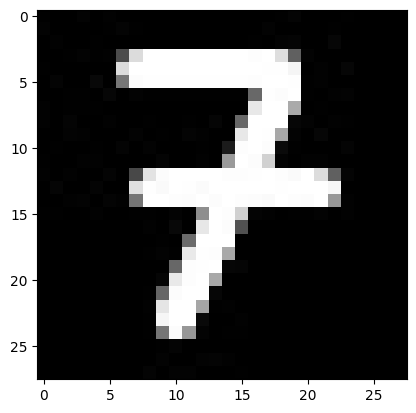

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step


(array([2]), array([1.], dtype=float32))

In [ ]:
predict_digit(model, "/Out_Of_Sample_Data/Image_7.jpg")

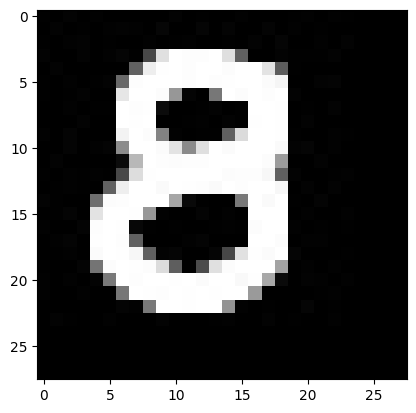

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


(array([8]), array([1.], dtype=float32))

In [ ]:
predict_digit(model, "/Out_Of_Sample_Data/Image_8.jpg")

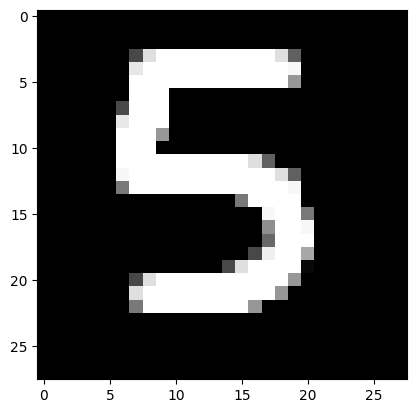

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


(array([5]), array([1.], dtype=float32))

In [ ]:
predict_digit(model, "/Out_Of_Sample_Data/Image_5.jpg")